### 코인간의 상관관계를 계산합니다.

"KRW-BTC"  
"KRW-ETH"  
"KRW-IOTA"  

KRW-XEM : 에러처리를 어떻게 해야하는지..

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

### 상관관계를 위한 데이터를 로드합니다.

In [56]:
import pandas as pd
import pyupbit
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
# coin_list = ["KRW-BTC", "KRW-ETH", "KRW-IOTA"]
# tickers = ["KRW-BTC", "KRW-ETH"]
tickers = pyupbit.get_tickers(fiat="KRW")

df = {}
for coin in tickers:
    print(coin)
    data = pyupbit.get_ohlcv(coin)
    if data is not None:
        df[coin] = data["close"]
    
df = pd.DataFrame(df)


KRW-BTC
KRW-ETH
KRW-NEO
KRW-MTL
KRW-LTC
KRW-XRP
KRW-ETC
KRW-OMG
KRW-SNT
KRW-WAVES
KRW-XEM
It failed JSONDecodeError
TypeError
KRW-QTUM
It failed JSONDecodeError
TypeError
KRW-LSK
It failed JSONDecodeError
TypeError
KRW-STEEM
It failed JSONDecodeError
TypeError
KRW-XLM
It failed JSONDecodeError
TypeError
KRW-ARDR
It failed JSONDecodeError
TypeError
KRW-KMD
KRW-ARK
KRW-STORJ
KRW-GRS
KRW-REP
KRW-EMC2
KRW-ADA
KRW-SBD
KRW-POWR
KRW-BTG
KRW-ICX
It failed JSONDecodeError
TypeError
KRW-EOS
It failed JSONDecodeError
TypeError
KRW-TRX
It failed JSONDecodeError
TypeError
KRW-SC
It failed JSONDecodeError
TypeError
KRW-IGNIS
It failed JSONDecodeError
TypeError
KRW-ONT
It failed JSONDecodeError
TypeError
KRW-ZIL
It failed JSONDecodeError
TypeError
KRW-POLY
It failed JSONDecodeError
TypeError
KRW-ZRX
It failed JSONDecodeError
TypeError
KRW-LOOM
KRW-BCH
KRW-ADX
KRW-BAT
KRW-IOST
KRW-DMT
KRW-RFR
KRW-CVC
KRW-IQ
KRW-IOTA
KRW-MFT
It failed JSONDecodeError
TypeError
KRW-ONG
It failed JSONDecodeError
TypeErro

DATA를 확인합니다.

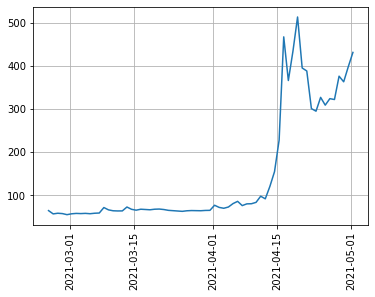

In [95]:
plt.plot(df["KRW-DOGE"])

plt.grid()
plt.xticks(rotation=90)
plt.show()

#### CORR

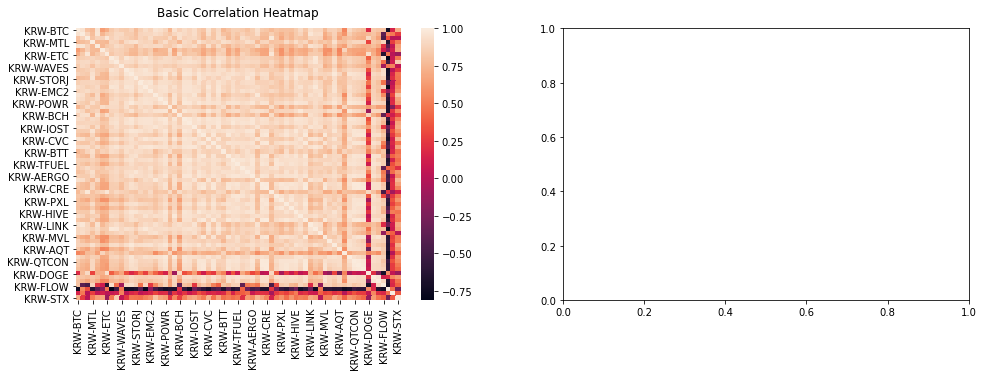

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(df.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# # 상관관계 수치 그래프 [Correlation Heatmap with Number]
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
# ax[1].set_title('Correlation Heatmap with Number', pad = 12)

plt.show()


### IOTA을 중심으로 데이터를 관찰합니다.

#### IOTA와의 corr

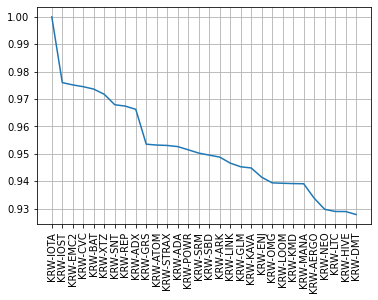

In [67]:
corr = df.corr()
iota = corr["KRW-IOTA"]

corr_top = iota.sort_values(ascending=False)IOTA을 중심으로 데이터를 관찰합니다.
plt.plot(corr_top.head(30))

plt.grid()
plt.xticks(rotation=90)
plt.show()


#### 상위 10에 대한 상관관계를 알아본다.

KRW-IOST
KRW-EMC2
KRW-CVC
KRW-BAT
KRW-XTZ
KRW-SNT
KRW-REP
KRW-ADX
KRW-GRS


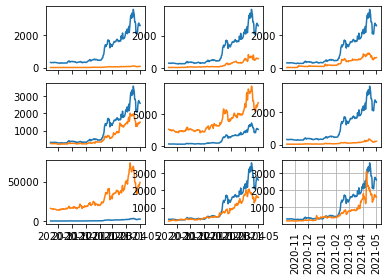

In [92]:
fig, axs = plt.subplots(3, 3, sharex='all')


for i, ticker in enumerate(corr_top.head(10).index[1:]):
    print(ticker)
    axs[int(i/3), i%3].plot(df["KRW-IOTA"])
    axs[int(i/3), i%3].plot(df[ticker])
#     axs[int(i/3), i%3].xticks(rotation=90)

plt.grid()
plt.xticks(rotation=90)Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
plt.show()

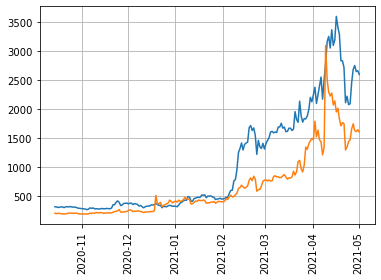

In [93]:
plt.plot(df["KRW-IOTA"])
plt.plot(df["KRW-GRS"])

plt.grid()
plt.xticks(rotation=90)
plt.show()